In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# customer = '/content/drive/MyDrive/Customer_Segmentation.csv'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [10]:
#customer_data = pd.read_csv(customer)
customer_data = pd.read_csv('customer_segmentation.csv')

In [11]:
customer_data.head()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


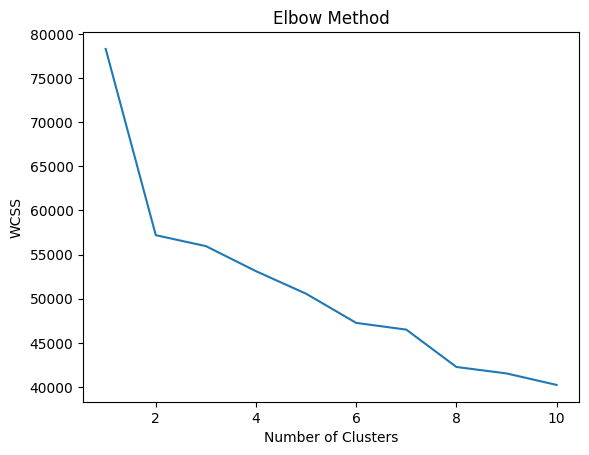

In [12]:
data = customer_data[['gender', 'country']]  # Selecting relevant columns for clustering

# One-hot encoding categorical variables
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data)

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(encoded_data.toarray())
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
unique_countries = customer_data['country'].unique()

In [23]:
unique_countries = customer_data['country'].unique().tolist()

# Save the list of unique countries to a file
with open('unique_countries.txt', 'w') as file:
    for country in unique_countries:
        file.write(country + '\n')

In [24]:
unique_genders = customer_data['gender'].unique().tolist()

# Save the list of unique genders to a file
with open('unique_genders.txt', 'w') as file:
    for gender in unique_genders:
        file.write(gender + '\n')

In [25]:
from sklearn.cluster import KMeans
data = customer_data[['gender', 'country']]  # Selecting relevant columns for segmentation

# One-hot encoding categorical variables
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data)

filename = 'ohe.pkl'
pickle.dump(encoder, open(filename, 'wb')) 
# Choosing the number of clusters (you can use other methods like elbow method to find the optimal number)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
customer_data['segment'] = kmeans.fit_predict(encoded_data.toarray())
filename = 'customer_segmenattion.pkl'
pickle.dump(kmeans, open(filename, 'wb')) 
# Analyze the segments
segment_means = customer_data.groupby('segment').mean()
print(segment_means)

          latitude  longitude  street_number
segment                                     
0        24.769234  43.899750   11056.584024
1        24.805212  44.171602   11089.673244


C:\Users\hp\AppData\Local\Temp\ipykernel_9636\2484940954.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_means = customer_data.groupby('segment').mean()
